## Avacado Project
##### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

##### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

##### Some relevant columns in the dataset:

##### Date - The date of the observation
##### AveragePrice - the average price of a single avocado
##### type - conventional or organic
##### year - the year
##### Region - the city or region of the observation
##### Total Volume - Total number of avocados sold
##### 4046 - Total number of avocados with PLU 4046 sold
##### 4225 - Total number of avocados with PLU 4225 sold
##### 4770 - Total number of avocados with PLU 4770 sold


##### Inspiration /Label 

##### The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [30]:
#import all the required libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [31]:
#import dataframe
df = pd.read_csv("avocado.csv")
print(df.shape)
df

(16468, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.isna().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [34]:
df.isna().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

### Here we can see that their are around 90 percent of our datain all the columns is just only nan values , so we have to remove all te nan values so that we can proceed .

In [35]:
df = df.dropna(how='any',axis=0)

In [36]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### All the nan value has been removed

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 177.8+ KB


In [38]:
df.shape

(1517, 14)

#### finally our data got a shape of 1517 rows and 14 columns

### Statistical Summary

In [39]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [40]:
# finding categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['Date', 'type', 'region']


In [41]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Date', 'type', 'region']


In [42]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 11 numerical variables

The numerical variables are : ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


In [43]:
pd.options.display.max_colwidth =None
col_name=[]
num=[]
feat=[]
for i in categorical_columns:
    col_name.append(i)
    num.append(len(df[i].unique()))
    feat.append(df[i].unique())
inf=pd.DataFrame({'FEATURE':col_name,"NUMBER OF UNIQUE FEATURES":num,"UNIQUE FEATURES":feat})
inf

,FEATURE,NUMBER OF UNIQUE FEATURES,UNIQUE FEATURES
0,Date,104,"[27-12-2015, 20-12-2015, 13-12-2015, 06-12-2015, 29-11-2015, 22-11-2015, 15-11-2015, 08-11-2015, 01-11-2015, 25-10-2015, 18-10-2015, 11-10-2015, 04-10-2015, 27-09-2015, 20-09-2015, 13-09-2015, 06-09-2015, 30-08-2015, 23-08-2015, 16-08-2015, 09-08-2015, 02-08-2015, 26-07-2015, 19-07-2015, 12-07-2015, 05-07-2015, 28-06-2015, 21-06-2015, 14-06-2015, 07-06-2015, 31-05-2015, 24-05-2015, 17-05-2015, 10-05-2015, 03-05-2015, 26-04-2015, 19-04-2015, 12-04-2015, 05-04-2015, 29-03-2015, 22-03-2015, 15-03-2015, 08-03-2015, 01-03-2015, 22-02-2015, 15-02-2015, 08-02-2015, 01-02-2015, 25-01-2015, 18-01-2015, 11-01-2015, 04-01-2015, 25-12-2016, 18-12-2016, 11-12-2016, 04-12-2016, 27-11-2016, 20-11-2016, 13-11-2016, 06-11-2016, 30-10-2016, 23-10-2016, 16-10-2016, 09-10-2016, 02-10-2016, 25-09-2016, 18-09-2016, 08-05-2016, 01-05-2016, 24-04-2016, 17-04-2016, 10-04-2016, 03-04-2016, 27-03-2016, 20-03-2016, 13-03-2016, 06-03-2016, 28-02-2016, 21-02-2016, 14-02-2016, 07-02-2016, 31-01-2016, 12-06-2016, 05-06-2016, 29-05-2016, 22-05-2016, 15-05-2016, 24-01-2016, 17-01-2016, 10-01-2016, 03-01-2016, 11-09-2016, 04-09-2016, 28-08-2016, 21-08-2016, 14-08-2016, 07-08-2016, 31-07-2016, 24-07-2016, 17-07-2016, ...]"
1,type,1,[conventional]
2,region,51,"[Albany, Atlanta, BaltimoreWashington, Boise, Boston, BuffaloRochester, California, Charlotte, Chicago, Columbus, DallasFtWorth, Denver, Detroit, GrandRapids, GreatLakes, HarrisburgScranton, HartfordSpringfield, Houston, Indianapolis, Jacksonville, LasVegas, LosAngeles, Louisville, MiamiFtLauderdale, Midsouth, Nashville, NewYork, Northeast, NorthernNewEngland, Orlando, Philadelphia, PhoenixTucson, Pittsburgh, Plains, Portland, RaleighGreensboro, RichmondNorfolk, Roanoke, SanDiego, SanFrancisco, Seattle, SouthCarolina, SouthCentral, Southeast, Spokane, StLouis, Syracuse, Tampa, TotalUS, West, WestTexNewMexico]"


In [45]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


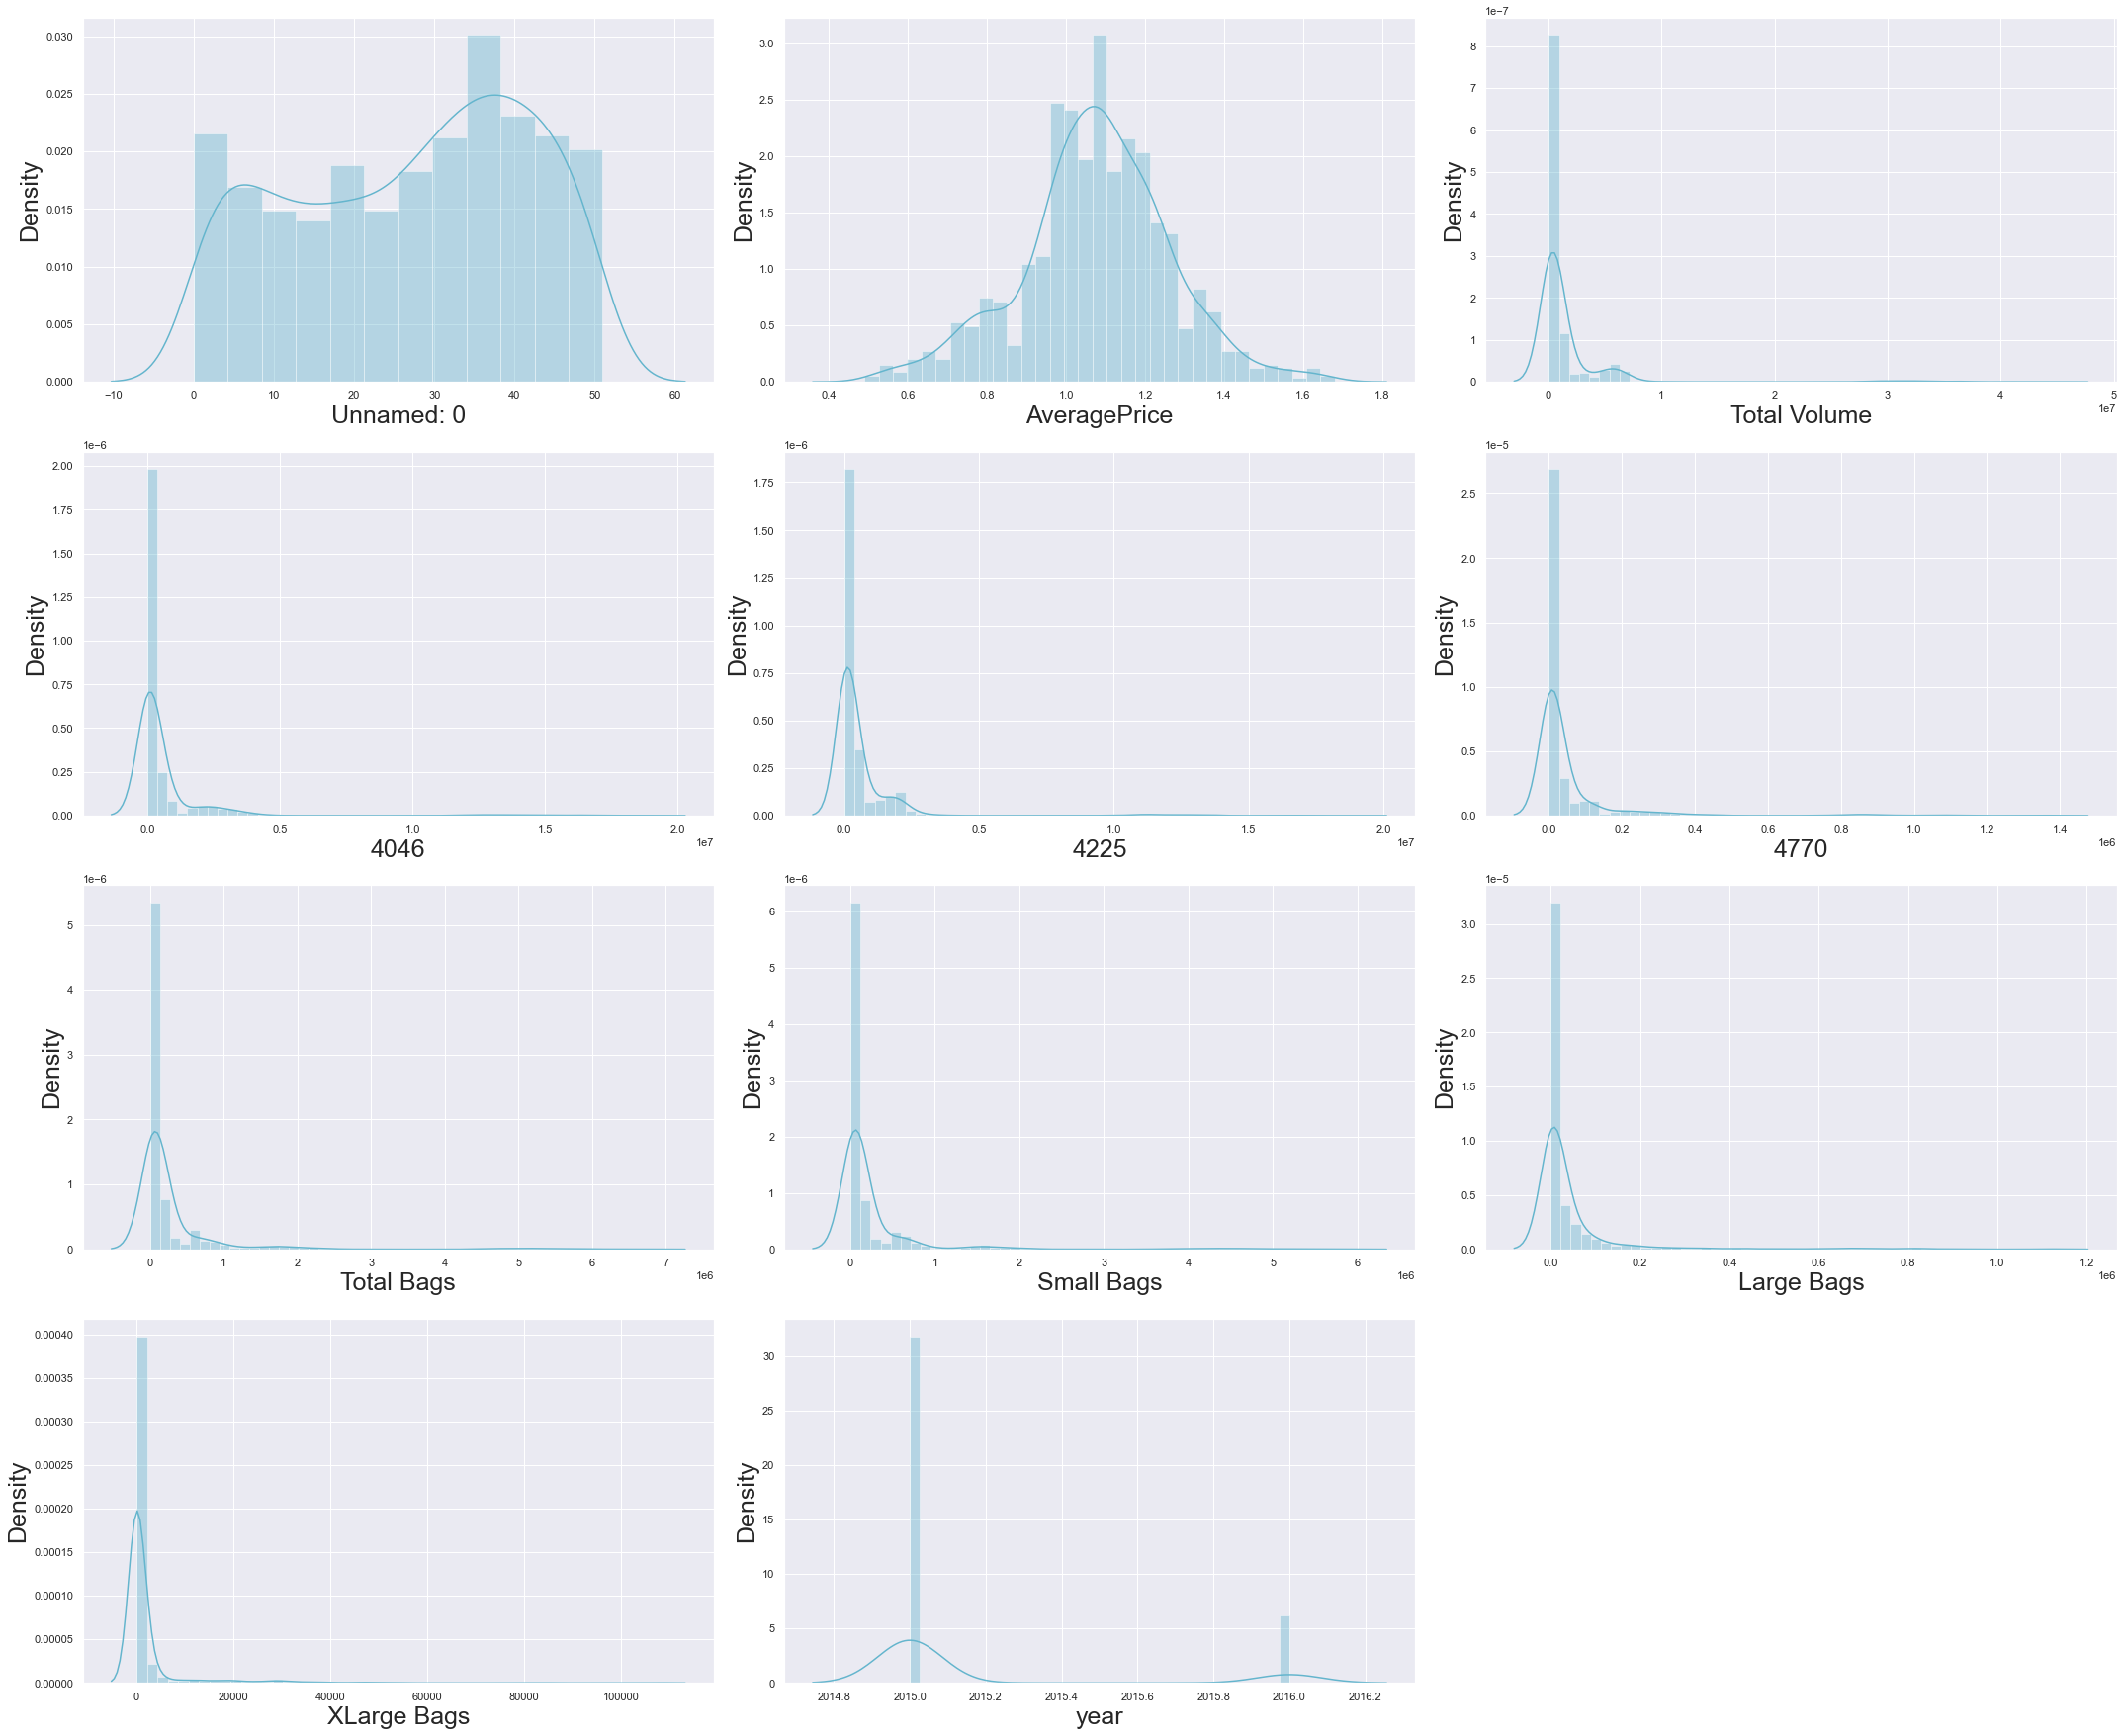

In [44]:
#Distribution plot for all numerical columns
sns.set(style="darkgrid")

plt.figure(figsize = (30,30))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column],color='c')
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
    plotnumber+=1
plt.tight_layout()


### Distribution plot also showing outlier in the dataset 

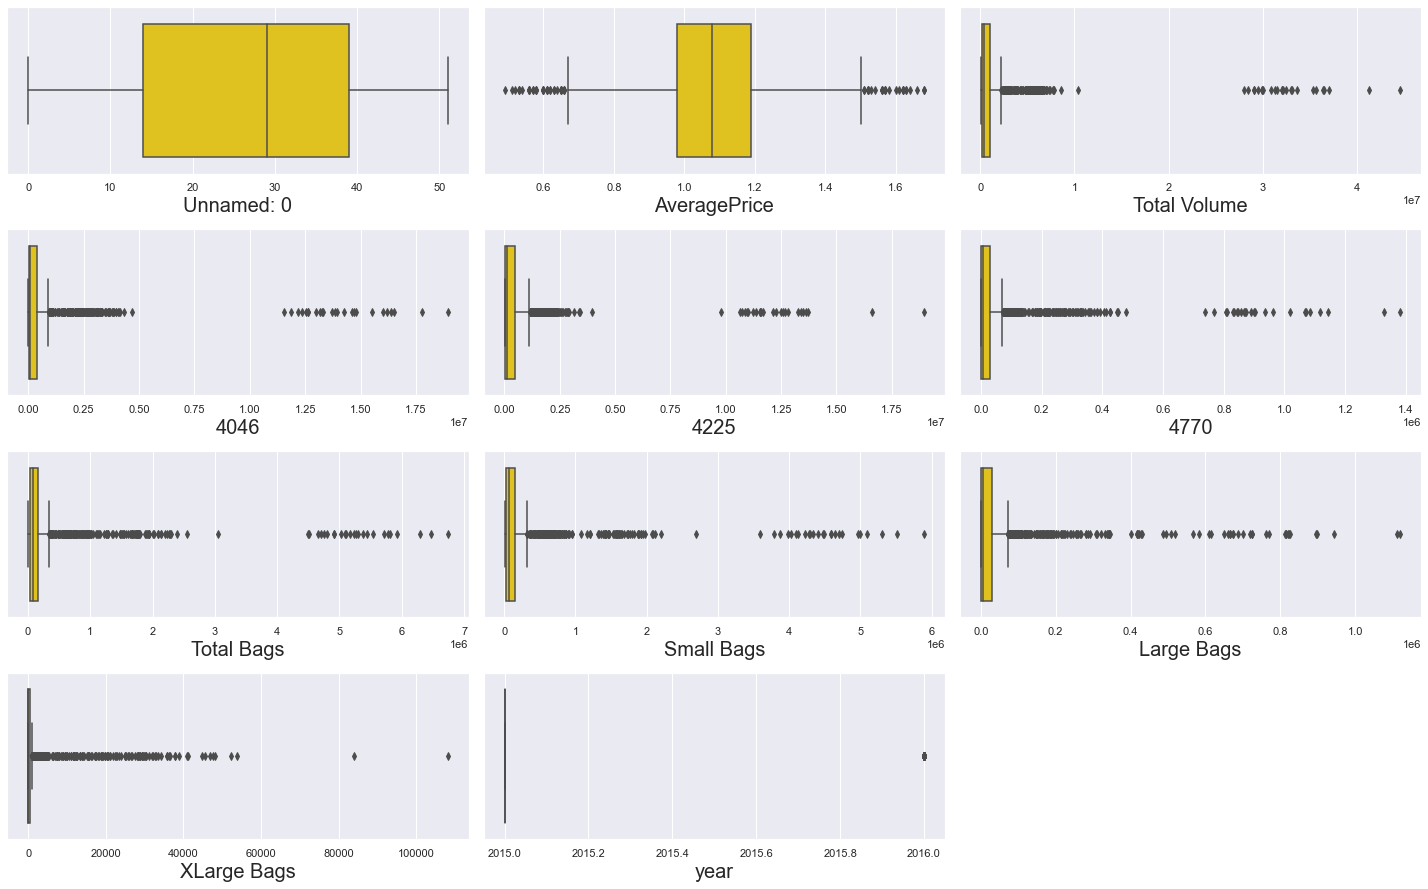

In [46]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
    
    
plt.tight_layout()

In [47]:
pd.options.display.max_colwidth =None
col_name=[]
num=[]
feat=[]
for i in numerical_columns:
    col_name.append(i)
    num.append(len(df[i].unique()))
    feat.append(df[i].unique())
inf=pd.DataFrame({'FEATURE':col_name,"NUMBER OF UNIQUE FEATURES":num,"UNIQUE FEATURES":feat})
inf

,FEATURE,NUMBER OF UNIQUE FEATURES,UNIQUE FEATURES
0,Unnamed: 0,52,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0]"
1,AveragePrice,113,"[1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12, 1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43, 1.2, 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.0, 1.09, 0.95, 0.97, 1.15, 1.01, 1.14, 1.1, 1.04, 1.18, 1.29, 1.25, 1.03, 1.39, 1.4, 1.36, 1.3, 0.88, 1.21, 0.9, 0.94, 0.75, 0.77, 0.81, 0.8, 0.72, 0.79, 0.67, 0.82, 0.68, 0.76, 0.91, 1.38, 0.92, 0.78, 0.74, 0.62, 0.83, 0.87, 0.73, 0.7, 0.89, 0.85, 1.44, 1.42, 1.41, 0.49, 0.53, 0.66, 0.56, 0.6, 0.71, 0.65, 0.58, 0.54, 0.52, 0.51, 0.57, 0.63, 0.64, 0.61, 0.84, 0.86, 0.69, 1.52, 1.53, 1.49, 1.48, 1.56, 1.62, ...]"
2,Total Volume,1517,"[64236.62, 54876.98, 118220.22, 78992.15, 51039.6, 55979.78, 83453.76, 109428.33, 99811.42, 74338.76, 84843.44, 64489.17, 61007.1, 106803.39, 69759.01, 76111.27, 99172.96, 105693.84, 79992.09, 80043.78, 111140.93, 75133.1, 106757.1, 96617.0, 124055.31, 109252.12, 89534.81, 104849.39, 89631.3, 122743.06, 95123.62, 101470.91, 109857.47, 120427.91, 59197.67, 49585.46, 49064.73, 48364.29, 47362.13, 67799.08, 46346.85, 43045.79, 40507.36, 55595.74, 45675.05, 41567.62, 51253.97, 70873.6, 45147.5, 44511.28, 41195.08, 40873.28, 386100.49, 331377.53, 417772.47, 357636.82, 333280.79, 356414.57, 339860.68, 334041.6, 419088.74, 358478.08, 349072.48, 433874.46, 418682.26, 370321.17, 516432.6, 417232.18, 472136.53, 382972.72, 379054.29, 465213.81, 503791.72, 405898.44, 437377.75, 557212.99, 407204.88, 562462.33, 435210.71, 554763.76, 465804.78, 551009.05, 454702.0, 623212.04, 451250.7, 480071.18, 634213.1, 448596.76, 430966.34, 451101.89, 383139.49, 596819.4, 642682.4, 619509.33, 649141.25, 545800.05, 572019.8, 718330.48, 830967.23, 742220.67, ...]"
3,4046,1517,"[1036.74, 674.28, 794.7, 1132.0, 941.48, 1184.27, 1368.92, 703.75, 1022.15, 842.4, 924.86, 1582.03, 2268.32, 1204.88, 1028.03, 985.73, 879.45, 689.01, 733.16, 539.65, 584.63, 509.94, 648.75, 1042.1, 672.25, 869.45, 664.23, 804.01, 850.58, 656.71, 922.37, 680.27, 1150.55, 1420.43, 919.87, 875.65, 774.15, 864.27, 961.77, 1402.28, 2141.83, 2128.26, 795.68, 629.46, 1088.38, 986.66, 1357.37, 1353.9, 941.38, 914.14, 1002.85, 2819.5, 292097.36, 251774.15, 324932.28, 283024.01, 250288.65, 269799.03, 263915.78, 250441.38, 290457.5, 236814.29, 228710.28, 255933.32, 265797.09, 262107.44, 346118.51, 278048.26, 303113.24, 275818.27, 274462.42, 362579.51, 385027.71, 306587.86, 335372.02, 446100.17, 310080.33, 436377.91, 331353.43, 449311.47, 386370.5, 455565.92, 382900.99, 538126.94, 386400.89, 413452.96, 538403.48, 387676.81, 368709.65, 377578.48, 318473.47, 40450.49, 44741.37, 44400.26, 51129.29, 41028.15, 40867.8, 47109.75, 58579.27, 51860.07, ...]"
4,4225,1517,"[54454.85, 44638.81, 109149.67, 71976.41, 43838.39, 48067.99, 73672.72, 101815.36, 87315.57, 64757.44, 75595.85, 52677.92, 49880.67, 99409.21, 59313.12, 65696.86, 90062.62, 94362.67, 67933.79, 68666.01, 100961.46, 62035.06, 91949.05, 82049.4, 94693.52, 72600.55, 57545.79, 76688.55, 55400.94, 99220.82, 70469.69, 71376.81, 81955.16, 102000.52, 45490.05, 35841.75, 33941.51, 30374.15, 35577.66, 58623.22, 34313.56, 30447.17, 30370.64, 45633.34, 35056.13, 30045.51, 39111.81, 60017.2, 33196.16, 31540.32, 31640.34, 28287.42, 27350.92, 20702.45, 31019.08, 23740.85, 28889.63, 29732.3, 28442.45, 34483.33, 62980.07, 64607.97, 59731.79, 91047.32, 92780.33, 61870.63, 82762.72, 62485.97, 73675.85, 44839.12, 46223.69, 41992.44, 47040.07, 41906.78, 44087.07, 47838.42, 37953.24, 54675.38, 37698.53, 30231.78, 17701.12, 22414.17, 19543.18, 27284.43, 18618.84, 18860.63, 28568.26, 18366.33, 18040.85, 22419.95, 19254.39, 394104.02, 434590.82, 399851.59, 453586.5, 379

In [48]:
df['year'].value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

In [49]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [50]:
df['Unnamed: 0'].value_counts()

37.0    40
38.0    40
36.0    39
39.0    38
33.0    38
40.0    38
35.0    38
41.0    37
34.0    37
43.0    36
42.0    36
44.0    35
32.0    34
45.0    34
29.0    33
46.0    33
31.0    33
30.0    32
28.0    31
47.0    30
6.0     28
5.0     28
4.0     28
3.0     28
1.0     28
27.0    28
2.0     28
48.0    27
7.0     27
0.0     27
49.0    26
26.0    26
25.0    26
8.0     26
20.0    25
12.0    24
50.0    24
21.0    24
19.0    24
18.0    24
17.0    24
9.0     24
24.0    24
10.0    24
11.0    24
51.0    23
13.0    23
14.0    23
16.0    23
22.0    23
23.0    23
15.0    21
Name: Unnamed: 0, dtype: int64

In [51]:
df['Date'].value_counts()

12-04-2015    34
05-04-2015    34
19-04-2015    33
10-05-2015    32
22-03-2015    32
              ..
10-07-2016     3
03-07-2016     3
26-06-2016     3
19-06-2016     3
11-09-2016     2
Name: Date, Length: 104, dtype: int64

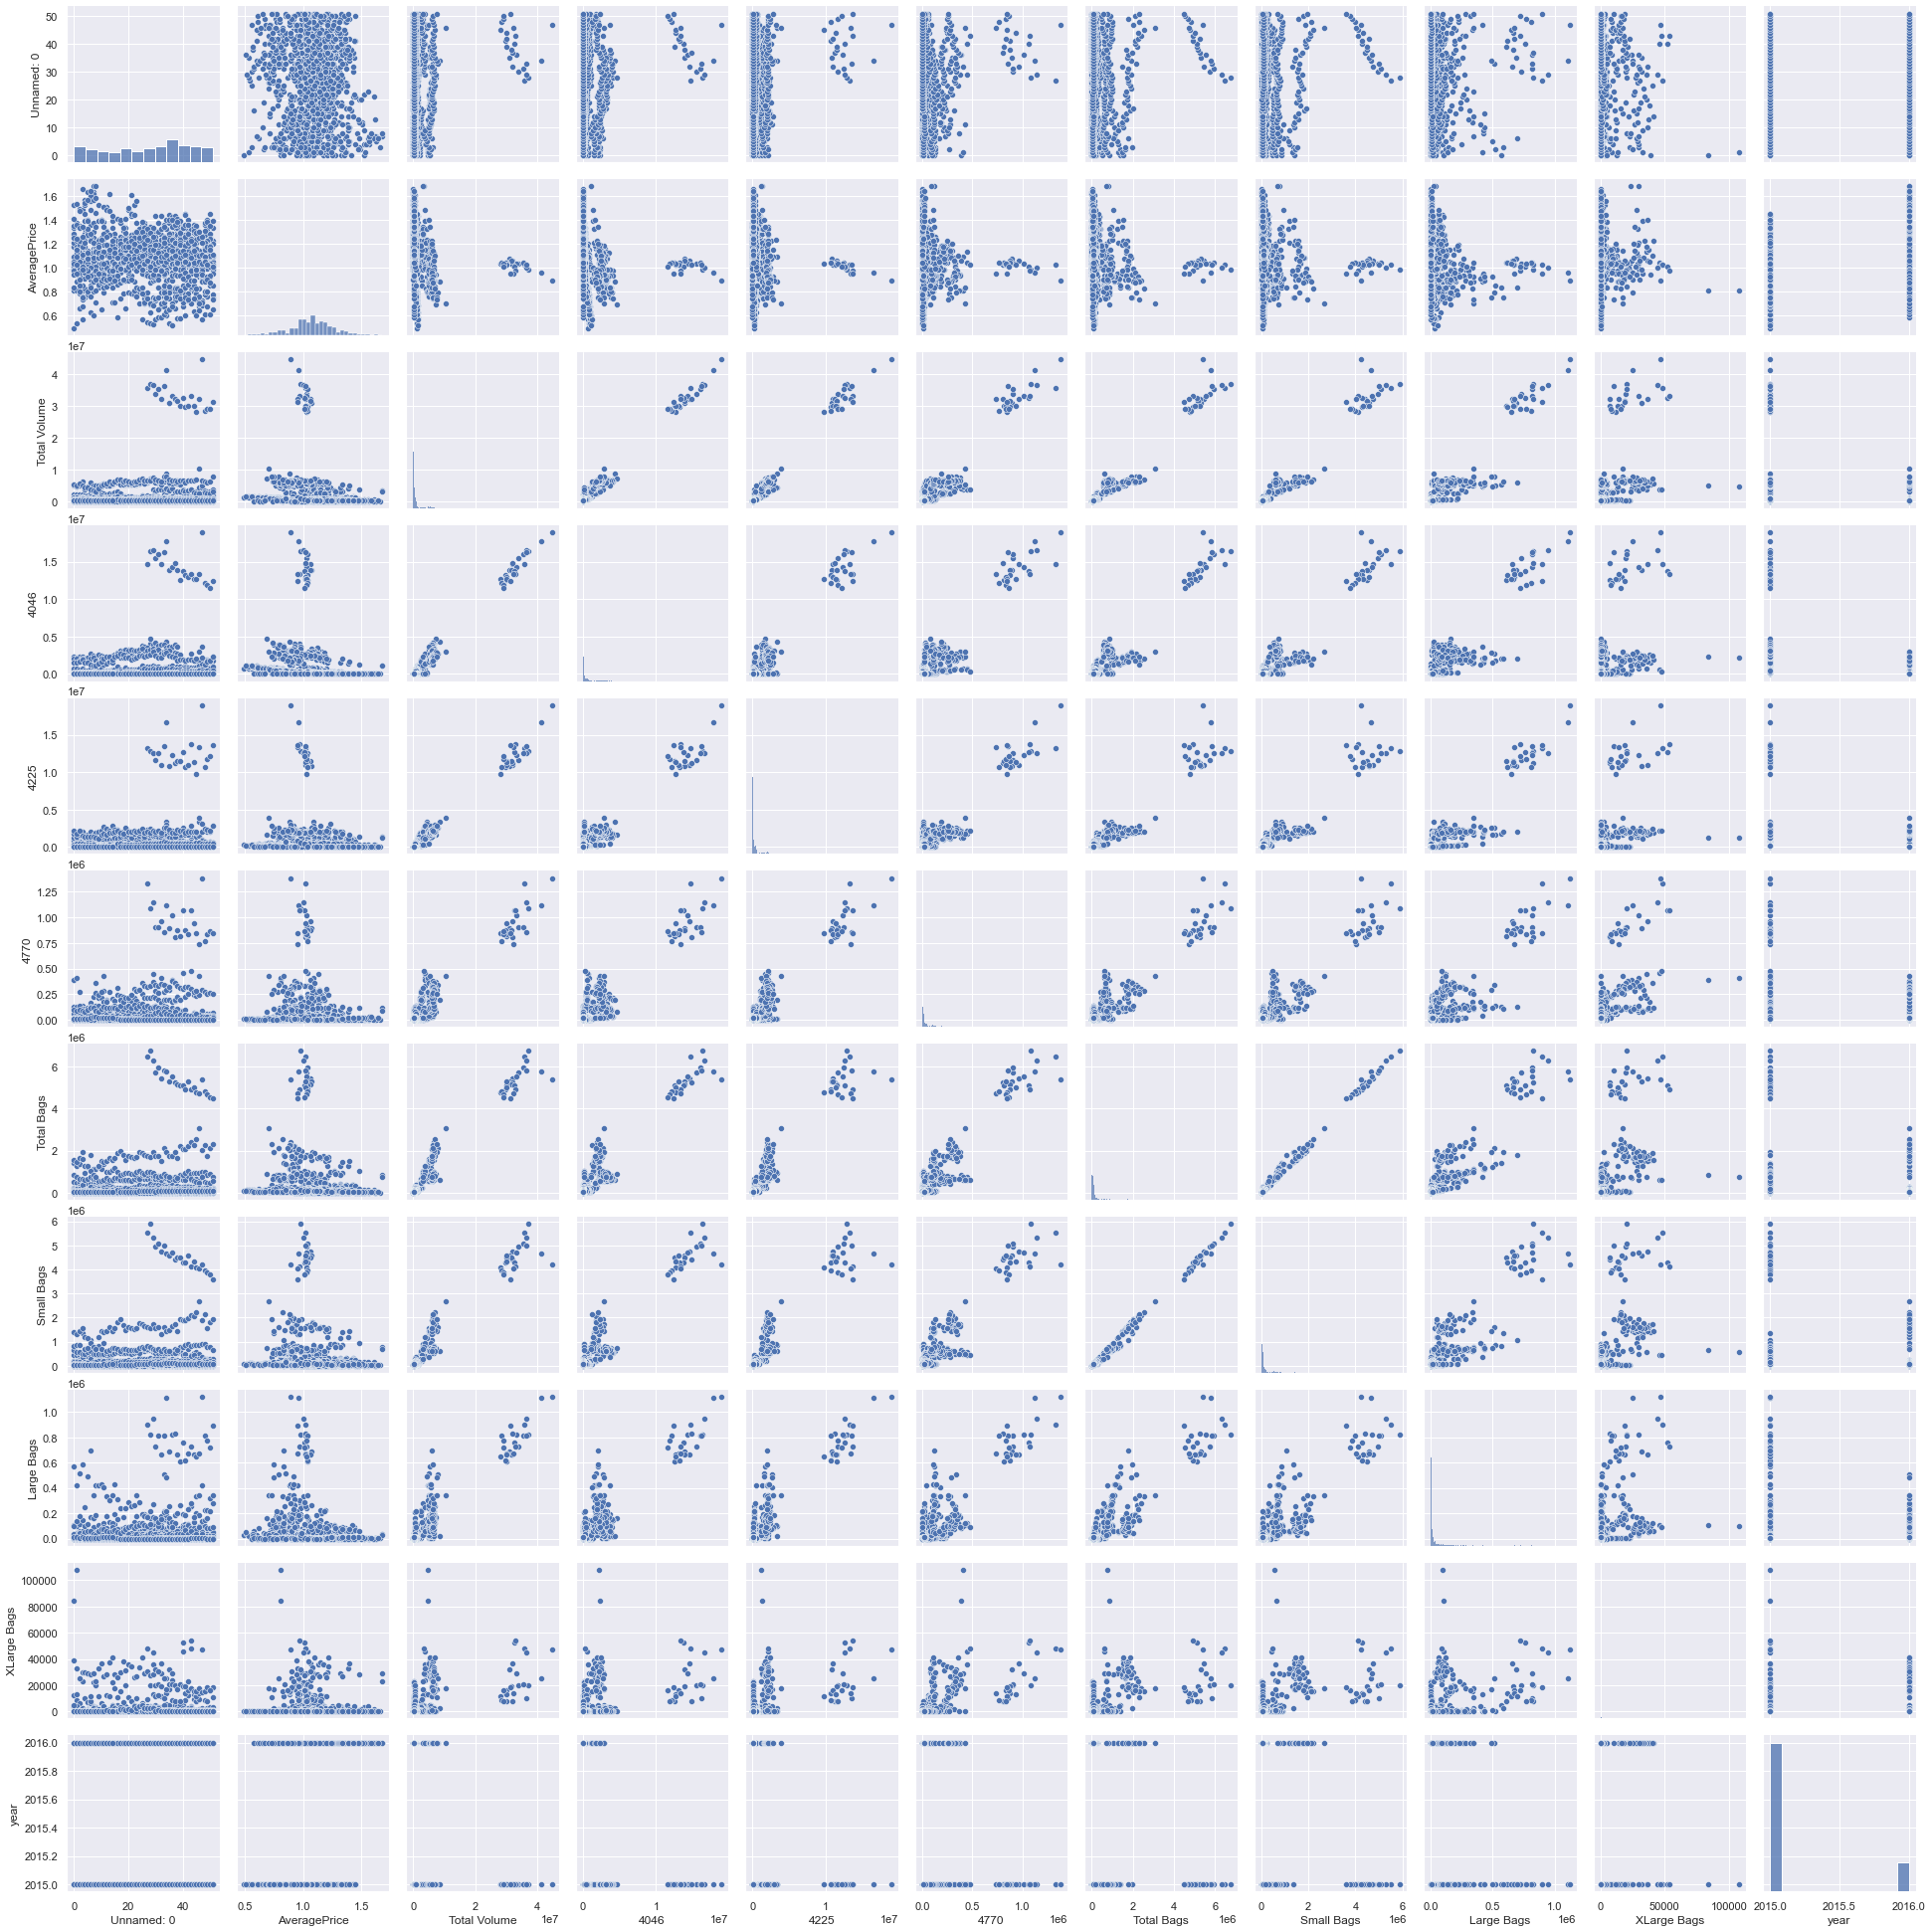

In [52]:
# Pairplot shows the relation of all the parameters with each other, how one parameter will vary with the other
sns.pairplot(df)
plt.show()

In [53]:
df.drop(columns=['type'], inplace=True)

Removeing 'type' as it has only one varrience so no point of keeping it and also 'Date' column is not showing much importance

In [55]:
df.drop(columns=['Date'], inplace=True)

### Encoding

In [57]:
import category_encoders as ce
ben=ce.BinaryEncoder(cols='region')

In [58]:
df=ben.fit_transform(df)
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region_0,region_1,region_2,region_3,region_4,region_5
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0,0,0,0,0,1
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0,0,0,0,0,1
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0,0,0,0,0,1
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0,0,0,0,0,1
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,0,0,1,0,0,0
1513,11.0,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,0,0,1,0,0,0
1514,12.0,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,0,0,1,0,0,0
1515,13.0,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,0,0,1,0,0,0


In [59]:
df.dtypes

Unnamed: 0      float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year            float64
region_0          int64
region_1          int64
region_2          int64
region_3          int64
region_4          int64
region_5          int64
dtype: object

###  Checking for the skewness

In [60]:
df.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region_0        0.694203
region_1        0.836741
region_2        0.479002
region_3        0.136243
region_4       -0.093801
region_5       -0.173529
dtype: float64

In [61]:
# Remove skewness 
for col in df.columns:
    if df.skew().loc[col] > 0.55:
        df[col] = np.log1p(df[col])

In [62]:
df.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
region_0        0.694203
region_1        0.836741
region_2        0.479002
region_3        0.136243
region_4       -0.093801
region_5       -0.173529
dtype: float64

In [63]:
# Checking the 'z score' / outliers of the dataset, if presnt, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(df))
print ('Before removing zscore: ', df.shape)

df_final = df.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", df_final.shape)

Before removing zscore:  (1517, 17)
After removing zscore:  (1502, 17)


In [64]:
# Assigning the input and output data
df_x = df_final.drop(columns = ['AveragePrice'])
y = df_final['AveragePrice']

In [65]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [66]:
x

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region_0,region_1,region_2,region_3,region_4,region_5
0,-1.818282,-1.375936,-1.840250,-0.561839,-1.826955,-1.712839,-1.562485,-0.959979,-0.804932,-0.439329,-0.705342,-0.660262,-0.795367,-0.938003,-1.054759,0.921821
1,-1.750970,-1.488857,-2.027012,-0.681143,-1.752789,-1.646316,-1.496328,-0.947025,-0.804932,-0.439329,-0.705342,-0.660262,-0.795367,-0.938003,-1.054759,0.921821
2,-1.683657,-0.938549,-1.955687,-0.144473,-1.438870,-1.761857,-1.612428,-0.930605,-0.804932,-0.439329,-0.705342,-0.660262,-0.795367,-0.938003,-1.054759,0.921821
3,-1.616345,-1.227667,-1.802077,-0.394396,-1.667886,-2.014484,-1.870139,-0.854726,-0.804932,-0.439329,-0.705342,-0.660262,-0.795367,-0.938003,-1.054759,0.921821
4,-1.549033,-1.540837,-1.882102,-0.692004,-1.651095,-1.967967,-1.830934,-0.740434,-0.804932,-0.439329,-0.705342,-0.660262,-0.795367,-0.938003,-1.054759,0.921821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,-1.145159,-0.595137,-0.094975,-0.541127,0.490978,-0.275016,-0.277526,0.423399,0.779701,2.276196,-0.705342,-0.660262,1.257281,-0.938003,-1.054759,-1.084809
1498,-1.077847,-0.644155,-0.218216,-0.587341,0.531313,-0.227658,-0.193345,0.368629,-0.804932,2.276196,-0.705342,-0.660262,1.257281,-0.938003,-1.054759,-1.084809
1499,-1.010535,-0.643451,-0.188752,-0.579301,0.472679,-0.238192,-0.212140,0.356808,1.135174,2.276196,-0.705342,-0.660262,1.257281,-0.938003,-1.054759,-1.084809
1500,-0.943223,-0.601608,-0.121601,-0.571408,0.490160,-0.220236,-0.180610,0.357524,-0.804932,2.276196,-0.705342,-0.660262,1.257281,-0.938003,-1.054759,-1.084809


In [67]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1502, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [72]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=r2_score(y_train,lr_train_pred)
    lr_test_accuracy=r2_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -  {round((lr_train_accuracy)*100,2)}--AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 86


TRAINING ACCURACY IS -  44.29--AND TESTING ACCURACY IS 44.29


AT RANDOM STATE-- 129


TRAINING ACCURACY IS -  44.18--AND TESTING ACCURACY IS 44.15


AT RANDOM STATE-- 188


TRAINING ACCURACY IS -  44.11--AND TESTING ACCURACY IS 44.13


AT RANDOM STATE-- 323


TRAINING ACCURACY IS -  44.18--AND TESTING ACCURACY IS 44.17


AT RANDOM STATE-- 391


TRAINING ACCURACY IS -  44.32--AND TESTING ACCURACY IS 44.34


AT RANDOM STATE-- 449


TRAINING ACCURACY IS -  44.25--AND TESTING ACCURACY IS 44.25


AT RANDOM STATE-- 551


TRAINING ACCURACY IS -  44.32--AND TESTING ACCURACY IS 44.35


AT RANDOM STATE-- 897


TRAINING ACCURACY IS -  44.36--AND TESTING ACCURACY IS 44.36


In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34)

In [74]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cross_val=cross_val_score(lr,x,y,cv=i).mean()
    print(f"\n\nCROSS VAL IS AT CV = {i} is {round(cross_val*100,2)}")



CROSS VAL IS AT CV = 2 is -34.8


CROSS VAL IS AT CV = 3 is -8.86


CROSS VAL IS AT CV = 4 is -19.3


CROSS VAL IS AT CV = 5 is -34.43


CROSS VAL IS AT CV = 6 is -64.85


CROSS VAL IS AT CV = 7 is -58.95


CROSS VAL IS AT CV = 8 is -14.97


CROSS VAL IS AT CV = 9 is -14.0


In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def score(mod,x_train,x_test,y_train,y_test,train):
    n=x_train.shape[0]
    p=6
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=r2_score(y_train,y_pred)
        mse=mean_squared_error(y_train,y_pred)
        mae=mean_absolute_error(y_train,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean sqaured error is --',mse)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=r2_score(y_test,y_pred)
        cross_val=cross_val_score(mod,x,y,cv=3).mean()
        ad_r=1-(1-accuracy)*(n-1)/(n-p-1)
        mse=mean_squared_error(y_test,y_pred)
        mae=mean_absolute_error(y_test,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCROSS VAL SCORE IS --',round(cross_val*100,2))
        print(f"\nadjusted r2_score for {mod} is {round(ad_r*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean aboslute error is -',mae)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)

In [78]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LinearRegression() is 45.79

mean sqaured error is -- 0.019521411932605648

mean sqaured error is -- 0.019521411932605648

root mean sqaured error is -- 0.13971904642032756

mean aboslute error is -- 0.11010061004479021

difference between rmse and mae is  0.02961843637553735


Testing SCORE FOR THE LinearRegression() is 37.12


CROSS VAL SCORE IS -- -8.86

adjusted r2_score for LinearRegression() is 36.81

mean sqaured error is -- 0.01911121235820826

mean aboslute error is - 0.11456495584554544

root mean sqaured error is -- 0.13824330854767714

mean aboslute error is -- 0.11456495584554544

difference between rmse and mae is  0.0236783527021317


In [79]:
from sklearn.linear_model import Lasso,LassoCV

In [80]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [81]:
alpha=lasscv.alpha_

In [82]:
lass_reg=Lasso(alpha)
lass_reg.fit(x_train,y_train)

Lasso(alpha=2.8851879861159344e-06)

In [83]:
print(f'TRAINING R2_SCORES USING LASSO IS {round(lass_reg.score(x_train,y_train)*100,2)}')

TRAINING R2_SCORES USING LASSO IS 45.79


In [84]:
print(f'TESTING R2_SCORES USING LASSO IS {round(lass_reg.score(x_test,y_test)*100,2)}')

TESTING R2_SCORES USING LASSO IS 37.12


###  MODEL 2)-DECISION TREE

In [85]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [86]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor() is 100.0

mean sqaured error is -- 1.5394610712837188e-34

mean sqaured error is -- 1.5394610712837188e-34

root mean sqaured error is -- 1.2407502050306979e-17

mean aboslute error is -- 1.3866232613969481e-18

difference between rmse and mae is  1.1020878788910031e-17


Testing SCORE FOR THE DecisionTreeRegressor() is 62.83


CROSS VAL SCORE IS -- -30.08

adjusted r2_score for DecisionTreeRegressor() is 62.64

mean sqaured error is -- 0.011298671096345515

mean aboslute error is - 0.07146179401993355

root mean sqaured error is -- 0.10629520730656446

mean aboslute error is -- 0.07146179401993355

difference between rmse and mae is  0.03483341328663091


In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
dt=DecisionTreeRegressor()
ppo={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(3,6),
    'random_state':[323,391,449,551,897],
    'max_depth':np.arange(28,32)}

In [89]:
lgt=GridSearchCV(dt,param_grid=ppo)

In [90]:
lgt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([28, 29, 30, 31]),
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4]),
                         'random_state': [323, 391, 449, 551, 897],
                         'splitter': ['best', 'random']})

In [91]:
lgt.best_params_

{'criterion': 'squared_error',
 'max_depth': 28,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 551,
 'splitter': 'random'}

In [92]:
dt=lgt.best_estimator_
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=28, min_samples_leaf=3, random_state=551,
                      splitter='random')

In [93]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(max_depth=28, min_samples_leaf=3, random_state=551,
                      splitter='random') is 90.64

mean sqaured error is -- 0.003369472000845856

mean sqaured error is -- 0.003369472000845856

root mean sqaured error is -- 0.05804715325359079

mean aboslute error is -- 0.04134499689412262

difference between rmse and mae is  0.016702156359468173


Testing SCORE FOR THE DecisionTreeRegressor(max_depth=28, min_samples_leaf=3, random_state=551,
                      splitter='random') is 74.09


CROSS VAL SCORE IS -- -9.06

adjusted r2_score for DecisionTreeRegressor(max_depth=28, min_samples_leaf=3, random_state=551,
                      splitter='random') is 73.96

mean sqaured error is -- 0.007876716858027202

mean aboslute error is - 0.06206782945736433

root mean sqaured error is -- 0.08875086961842797

mean aboslute error is -- 0.06206782945736433

difference between rmse and mae is  0.02668304016106364


### MODEL 3) KNN

In [94]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

In [95]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [96]:
score(knr,x_train,x_test,y_train,y_test,train=True)
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor() is 88.07

mean sqaured error is -- 0.004295890091590341

mean sqaured error is -- 0.004295890091590341

root mean sqaured error is -- 0.06554303999350611

mean aboslute error is -- 0.050169858451290586

difference between rmse and mae is  0.015373181542215522


Testing SCORE FOR THE KNeighborsRegressor() is 79.91


CROSS VAL SCORE IS -- -23.65

adjusted r2_score for KNeighborsRegressor() is 79.81

mean sqaured error is -- 0.006106418604651164

mean aboslute error is - 0.05988039867109636

root mean sqaured error is -- 0.07814357686112892

mean aboslute error is -- 0.05988039867109636

difference between rmse and mae is  0.018263178190032564


In [97]:
knr.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [98]:
pl={"n_neighbors":np.arange(3,6),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(25,35)}

In [99]:
kgs=GridSearchCV(knr,param_grid=pl)
kgs.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'n_neighbors': array([3, 4, 5]),
                         'weights': ['uniform', 'distance']})

In [100]:
kgs.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4, 'weights': 'distance'}

In [101]:
knr=kgs.best_estimator_

In [102]:
knr.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=25, n_neighbors=4, weights='distance')

In [103]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=25, n_neighbors=4, weights='distance') is 100.0

mean sqaured error is -- 2.5455306886741845e-16

mean sqaured error is -- 2.5455306886741845e-16

root mean sqaured error is -- 1.5954719329007905e-08

mean aboslute error is -- 4.680221427729737e-09

difference between rmse and mae is  1.1274497901278168e-08


-----------------------




Testing SCORE FOR THE KNeighborsRegressor(leaf_size=25, n_neighbors=4, weights='distance') is 83.56


CROSS VAL SCORE IS -- -26.97

adjusted r2_score for KNeighborsRegressor(leaf_size=25, n_neighbors=4, weights='distance') is 83.48

mean sqaured error is -- 0.0049964301923898285

mean aboslute error is - 0.054314099397055934

root mean sqaured error is -- 0.07068543125984186

mean aboslute error is -- 0.054314099397055934

difference between rmse and mae is  0.01637133186278593


### AGAIN TUNING THE PARAMETERS------------------------

In [104]:
knr=KNeighborsRegressor()
pu={"n_neighbors":np.arange(2,5),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(40,50)}

In [105]:
kgsv=GridSearchCV(knr,param_grid=pu)
kgsv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_neighbors': array([2, 3, 4]),
                         'weights': ['uniform', 'distance']})

In [106]:
kgsv.best_params_

{'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 4, 'weights': 'distance'}

In [107]:
knr=kgsv.best_estimator_

In [108]:
knr.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance')

In [109]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance') is 100.0

mean sqaured error is -- 2.5455306886741845e-16

mean sqaured error is -- 2.5455306886741845e-16

root mean sqaured error is -- 1.5954719329007905e-08

mean aboslute error is -- 4.680221427729737e-09

difference between rmse and mae is  1.1274497901278168e-08


-----------------------




Testing SCORE FOR THE KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance') is 83.56


CROSS VAL SCORE IS -- -26.97

adjusted r2_score for KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance') is 83.48

mean sqaured error is -- 0.0049964301923898285

mean aboslute error is - 0.054314099397055934

root mean sqaured error is -- 0.07068543125984186

mean aboslute error is -- 0.054314099397055934

difference between rmse and mae is  0.01637133186278593


### MODEL 4)-RANDOM FOREST REGRESSOR

In [110]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [111]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [112]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor() is 97.78

mean sqaured error is -- 0.0007993756119900031

mean sqaured error is -- 0.0007993756119900031

root mean sqaured error is -- 0.028273231368027306

mean aboslute error is -- 0.020904829308909197

difference between rmse and mae is  0.007368402059118109


Testing SCORE FOR THE RandomForestRegressor() is 83.33


CROSS VAL SCORE IS -- 31.02

adjusted r2_score for RandomForestRegressor() is 83.24

mean sqaured error is -- 0.005067474983388703

mean aboslute error is - 0.05387940199335546

root mean sqaured error is -- 0.0711861993885662

mean aboslute error is -- 0.05387940199335546

difference between rmse and mae is  0.017306797395210738


In [113]:
##HYPERPARAMETER TUNING
rfr=RandomForestRegressor()

In [114]:
par={"n_estimators":[60,72,82],
     "criterion":["squared_error", "absolute_error", "poisson"],
     "max_depth":[25,28,30],
     "min_samples_split":[2,3,5]}

In [115]:
rgs=GridSearchCV(rfr,param_grid=par)
rgs.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [25, 28, 30],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [60, 72, 82]})

In [116]:
rgs.best_params_

{'criterion': 'poisson',
 'max_depth': 25,
 'min_samples_split': 2,
 'n_estimators': 82}

In [117]:
rfr=rgs.best_estimator_

In [118]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor(criterion='poisson', max_depth=25, n_estimators=82) is 97.69

mean sqaured error is -- 0.0008301317236058492

mean sqaured error is -- 0.0008301317236058492

root mean sqaured error is -- 0.028812006587633724

mean aboslute error is -- 0.020911201482955683

difference between rmse and mae is  0.007900805104678041


Testing SCORE FOR THE RandomForestRegressor(criterion='poisson', max_depth=25, n_estimators=82) is 84.14


CROSS VAL SCORE IS -- 32.01

adjusted r2_score for RandomForestRegressor(criterion='poisson', max_depth=25, n_estimators=82) is 84.06

mean sqaured error is -- 0.004819863986987661

mean aboslute error is - 0.05237825135726444

root mean sqaured error is -- 0.06942524027317198

mean aboslute error is -- 0.05237825135726444

difference between rmse and mae is  0.017046988915907543


### MODEL 5) SVR

In [119]:
from sklearn.svm import SVR
svr=SVR()

In [120]:
svr.fit(x_train,y_train)

SVR()

In [121]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR() is 85.82

mean sqaured error is -- 0.005107116792682141

mean sqaured error is -- 0.005107116792682141

root mean sqaured error is -- 0.07146409442987535

mean aboslute error is -- 0.05919055668673976

difference between rmse and mae is  0.012273537743135589


Testing SCORE FOR THE SVR() is 79.46


CROSS VAL SCORE IS -- -3.02

adjusted r2_score for SVR() is 79.36

mean sqaured error is -- 0.006243627094788483

mean aboslute error is - 0.061404810466560926

root mean sqaured error is -- 0.07901662543280676

mean aboslute error is -- 0.061404810466560926

difference between rmse and mae is  0.01761181496624583


##### HYPERPARAMETER TUNING

In [122]:
parm={"epsilon":[0.1,0.2,0.3],
      "shrinking":[True,False],
      "gamma":['scale', 'auto']}

In [123]:
sgs=GridSearchCV(svr,param_grid=parm)

In [124]:
sgs.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'epsilon': [0.1, 0.2, 0.3], 'gamma': ['scale', 'auto'],
                         'shrinking': [True, False]})

In [125]:
sgs.best_params_

{'epsilon': 0.1, 'gamma': 'auto', 'shrinking': True}

In [126]:
svr=sgs.best_estimator_
svr.fit(x_train,y_train)

SVR(gamma='auto')

In [127]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR(gamma='auto') is 85.84

mean sqaured error is -- 0.0050990518185827895

mean sqaured error is -- 0.0050990518185827895

root mean sqaured error is -- 0.07140764537906841

mean aboslute error is -- 0.05916102536261985

difference between rmse and mae is  0.012246620016448558


Testing SCORE FOR THE SVR(gamma='auto') is 79.49


CROSS VAL SCORE IS -- -1.29

adjusted r2_score for SVR(gamma='auto') is 79.39

mean sqaured error is -- 0.006234303974688903

mean aboslute error is - 0.06138542417263156

root mean sqaured error is -- 0.0789576087194192

mean aboslute error is -- 0.06138542417263156

difference between rmse and mae is  0.01757218454678764


#### MODEL 6) ADA BOOST REGRESSOR

In [128]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()

In [129]:
adr.fit(x_train,y_train)

AdaBoostRegressor()

In [130]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor() is 69.07

mean sqaured error is -- 0.011137775338553412

mean sqaured error is -- 0.011137775338553412

root mean sqaured error is -- 0.10553565908522773

mean aboslute error is -- 0.08704844503857385

difference between rmse and mae is  0.018487214046653877


Testing SCORE FOR THE AdaBoostRegressor() is 58.77


CROSS VAL SCORE IS -- 27.47

adjusted r2_score for AdaBoostRegressor() is 58.56

mean sqaured error is -- 0.012533424851765918

mean aboslute error is - 0.09558364589867498

root mean sqaured error is -- 0.11195277956248303

mean aboslute error is -- 0.09558364589867498

difference between rmse and mae is  0.016369133663808058


#### HYPERPARAMETER TUNING

In [131]:
adr.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [132]:
para={
     'n_estimators':[48,52,60,72],
     'learning_rate':[0.001,0.025,0.03],
     'random_state':[323,391,449,551,897]}

In [133]:
ags=GridSearchCV(adr,param_grid=para)
ags.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.025, 0.03],
                         'n_estimators': [48, 52, 60, 72],
                         'random_state': [323, 391, 449, 551, 897]})

In [134]:
ags.best_params_

{'learning_rate': 0.03, 'n_estimators': 72, 'random_state': 391}

In [135]:
adr=ags.best_estimator_

In [136]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=391) is 58.41

mean sqaured error is -- 0.01497855122624767

mean sqaured error is -- 0.01497855122624767

root mean sqaured error is -- 0.12238689156215901

mean aboslute error is -- 0.09574309404944678

difference between rmse and mae is  0.02664379751271223


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=391) is 52.12


CROSS VAL SCORE IS -- 32.45

adjusted r2_score for AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=391) is 51.88

mean sqaured error is -- 0.014552706958467011

mean aboslute error is - 0.10031826958542028

root mean sqaured error is -- 0.12063460100015672

mean aboslute error is -- 0.10031826958542028

difference between rmse and mae is  0.020316331414736433


### IN ALL THE ABOVE MODELS I WILL CHOSE SVR MODEL(5) AS THE TRAINING AND TESTING SCORE ARE NOT THAT MUCH AS THAT OF IN OTHER MODEL 

### Classification for Dataset based on region

In [189]:
#import dataframe
ds = pd.read_csv("avocado.csv")
print(ds.shape)
ds

(16468, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
ds = ds.dropna(how='any',axis=0)

In [191]:
ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [192]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 177.8+ KB


In [193]:
ds.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


#### Checking correlation in the dataset

In [194]:
ds.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,-0.012854
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342


<AxesSubplot:>

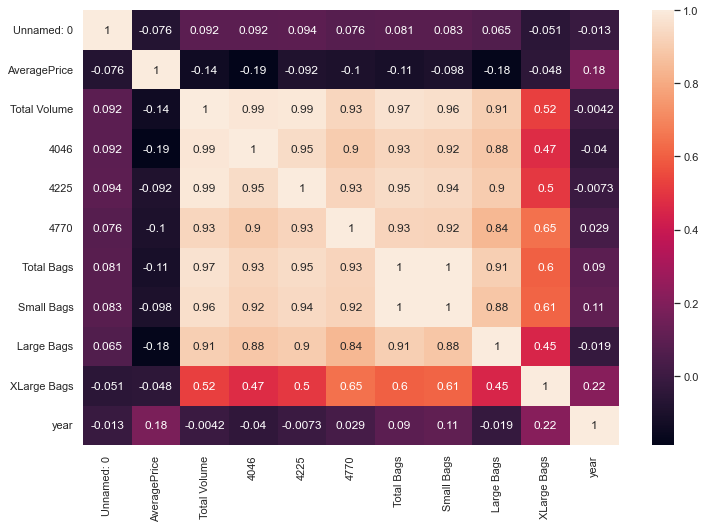

In [195]:
# Corelation through heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(ds.corr(), annot=True)

### Correlation are present in the data set

In [196]:
# finding categorical variables

categorical = [var for var in ds.columns if ds[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['Date', 'type', 'region']


In [197]:
# checking for categorical columns
categorical_columns=[]
for i in ds.dtypes.index:
    if ds.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Date', 'type', 'region']


In [198]:
numerical = [var for var in ds.columns if ds[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 11 numerical variables

The numerical variables are : ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


In [199]:
pd.options.display.max_colwidth =None
col_name=[]
num=[]
feat=[]
for i in categorical_columns:
    col_name.append(i)
    num.append(len(ds[i].unique()))
    feat.append(ds[i].unique())
inf=pd.DataFrame({'FEATURE':col_name,"NUMBER OF UNIQUE FEATURES":num,"UNIQUE FEATURES":feat})
inf

,FEATURE,NUMBER OF UNIQUE FEATURES,UNIQUE FEATURES
0,Date,104,"[27-12-2015, 20-12-2015, 13-12-2015, 06-12-2015, 29-11-2015, 22-11-2015, 15-11-2015, 08-11-2015, 01-11-2015, 25-10-2015, 18-10-2015, 11-10-2015, 04-10-2015, 27-09-2015, 20-09-2015, 13-09-2015, 06-09-2015, 30-08-2015, 23-08-2015, 16-08-2015, 09-08-2015, 02-08-2015, 26-07-2015, 19-07-2015, 12-07-2015, 05-07-2015, 28-06-2015, 21-06-2015, 14-06-2015, 07-06-2015, 31-05-2015, 24-05-2015, 17-05-2015, 10-05-2015, 03-05-2015, 26-04-2015, 19-04-2015, 12-04-2015, 05-04-2015, 29-03-2015, 22-03-2015, 15-03-2015, 08-03-2015, 01-03-2015, 22-02-2015, 15-02-2015, 08-02-2015, 01-02-2015, 25-01-2015, 18-01-2015, 11-01-2015, 04-01-2015, 25-12-2016, 18-12-2016, 11-12-2016, 04-12-2016, 27-11-2016, 20-11-2016, 13-11-2016, 06-11-2016, 30-10-2016, 23-10-2016, 16-10-2016, 09-10-2016, 02-10-2016, 25-09-2016, 18-09-2016, 08-05-2016, 01-05-2016, 24-04-2016, 17-04-2016, 10-04-2016, 03-04-2016, 27-03-2016, 20-03-2016, 13-03-2016, 06-03-2016, 28-02-2016, 21-02-2016, 14-02-2016, 07-02-2016, 31-01-2016, 12-06-2016, 05-06-2016, 29-05-2016, 22-05-2016, 15-05-2016, 24-01-2016, 17-01-2016, 10-01-2016, 03-01-2016, 11-09-2016, 04-09-2016, 28-08-2016, 21-08-2016, 14-08-2016, 07-08-2016, 31-07-2016, 24-07-2016, 17-07-2016, ...]"
1,type,1,[conventional]
2,region,51,"[Albany, Atlanta, BaltimoreWashington, Boise, Boston, BuffaloRochester, California, Charlotte, Chicago, Columbus, DallasFtWorth, Denver, Detroit, GrandRapids, GreatLakes, HarrisburgScranton, HartfordSpringfield, Houston, Indianapolis, Jacksonville, LasVegas, LosAngeles, Louisville, MiamiFtLauderdale, Midsouth, Nashville, NewYork, Northeast, NorthernNewEngland, Orlando, Philadelphia, PhoenixTucson, Pittsburgh, Plains, Portland, RaleighGreensboro, RichmondNorfolk, Roanoke, SanDiego, SanFrancisco, Seattle, SouthCarolina, SouthCentral, Southeast, Spokane, StLouis, Syracuse, Tampa, TotalUS, West, WestTexNewMexico]"


In [200]:
# Now checking for numerical columns
numerical_columns=[]
for i in ds.dtypes.index:
    if ds.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


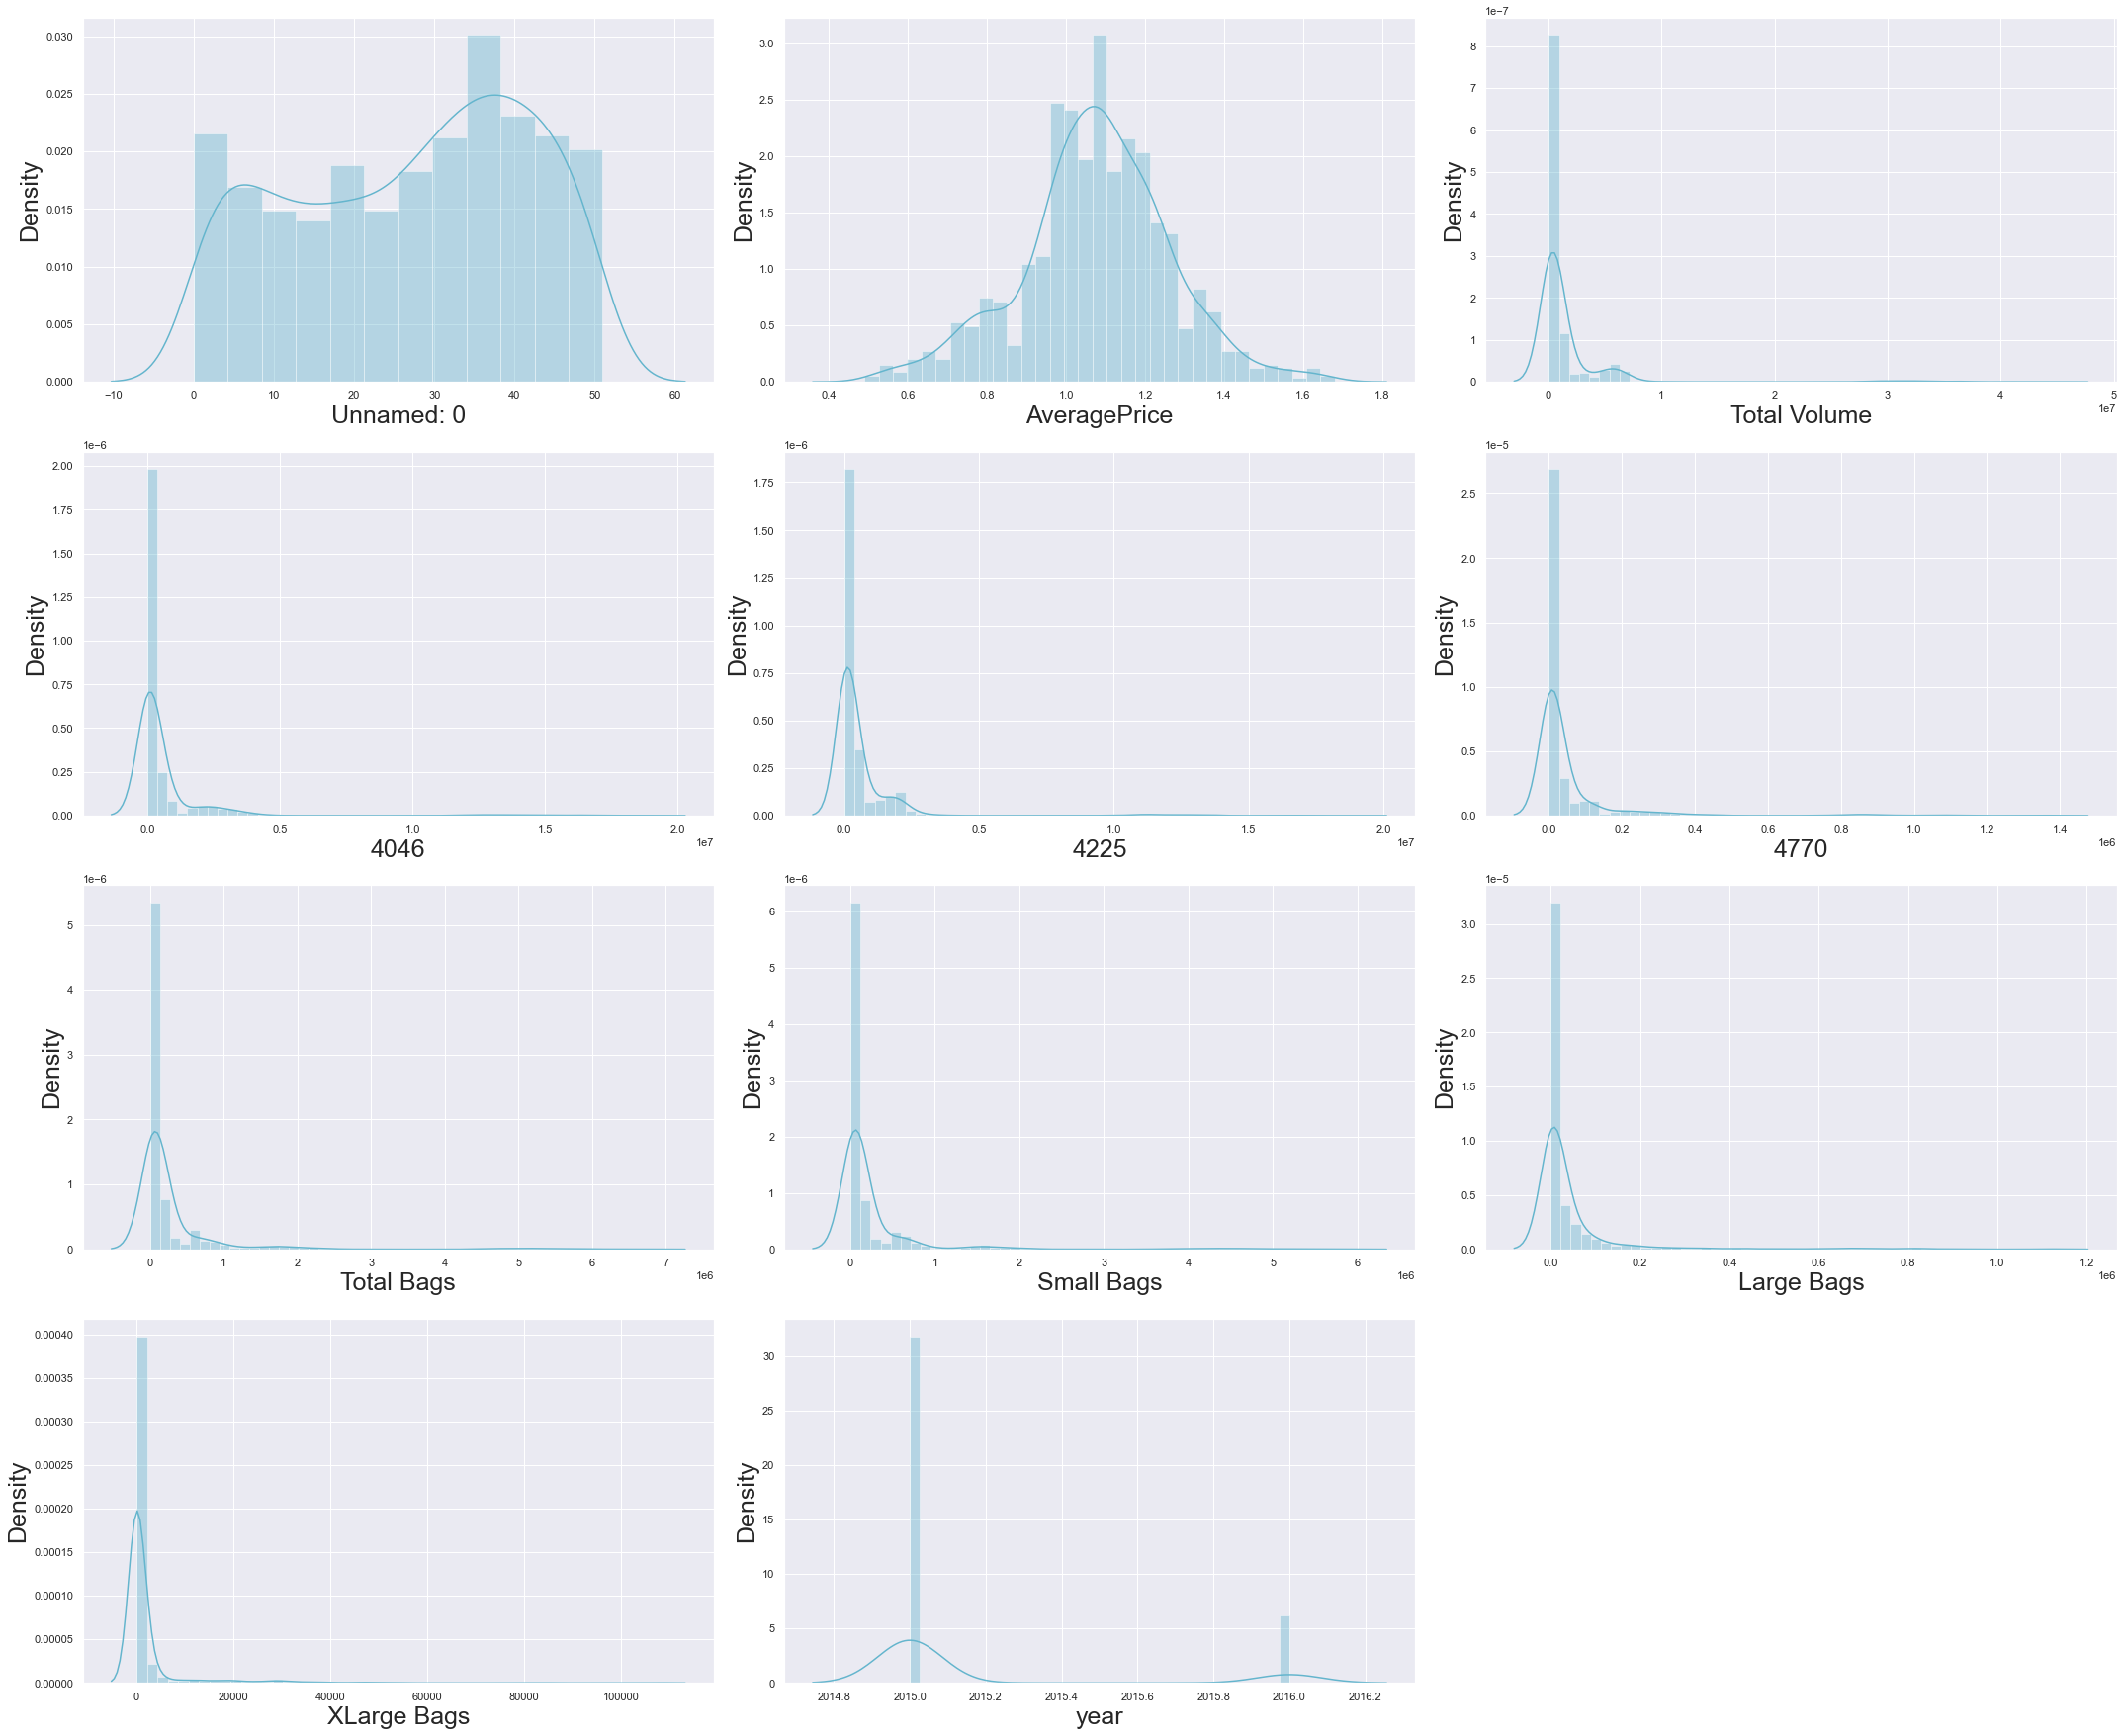

In [201]:
#Distribution plot for all numerical columns
sns.set(style="darkgrid")

plt.figure(figsize = (30,30))
plotnumber = 1
for column in ds[numerical_columns]:
    if plotnumber <=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(ds[column],color='c')
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
    plotnumber+=1
plt.tight_layout()

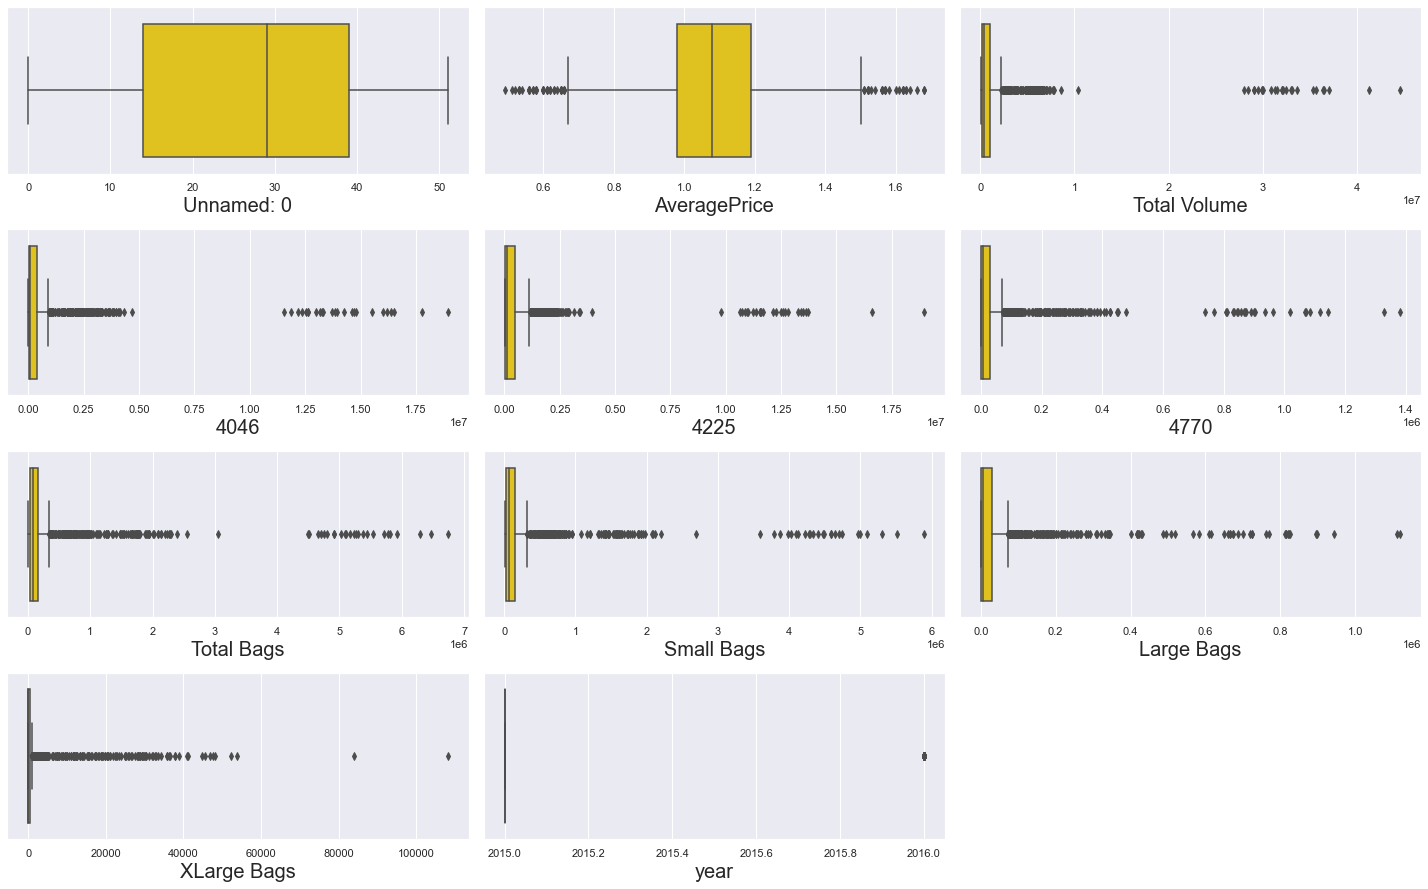

In [202]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(ds[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
    
    
plt.tight_layout()

### BOX PLOT showing that outliers are present in most of te columns

In [203]:
ds['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [204]:
ds.drop(columns=['type','Date'], inplace=True)

In [205]:
ds.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region'],
      dtype='object')

In [206]:
le = LabelEncoder()
ds['region'] = le.fit_transform(ds['region'].astype(str))

In [207]:
ds.dtypes

Unnamed: 0      float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year            float64
region            int32
dtype: object

In [208]:
ds.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

In [209]:
# Remove skewness 
for col in ds.columns:
    if ds.skew().loc[col] > 0.55:
        ds[col] = np.log1p(ds[col])

In [210]:
ds.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
region          0.288146
dtype: float64

In [211]:
for i in range(1, 5):
    # Remove skewness 
    for col in ds.columns:
        if ds.skew().loc[col] > 0.55:
            ds[col] = np.log1p(ds[col])

In [212]:
ds.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    0.442500
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.368284
Small Bags      0.409053
Large Bags     -0.912766
XLarge Bags     0.348073
year            1.828332
region          0.288146
dtype: float64

In [213]:
# Checking the 'z score' / outliers of the dataset, if presnt, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (1517, 12)
After removing zscore:  (1512, 12)


In [214]:
# Assigning the input and output data
ds_x = ds.drop(columns = ['region'])
y = ds['region']

In [215]:
ds_x

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0.0,1.33,2.490752,6.944801,10.905146,3.895080,2.309643,2.308573,4.545951,0.000000,0.567965
1,1.0,1.35,2.477619,6.515127,10.706381,4.083115,2.318433,2.317417,4.589955,0.000000,0.567965
2,2.0,0.93,2.540051,6.679222,11.600485,4.879007,2.303117,2.301843,4.645736,0.000000,0.567965
3,3.0,1.08,2.507737,7.032624,11.184108,4.298373,2.268791,2.266380,4.903495,0.000000,0.567965
4,4.0,1.28,2.471515,6.848515,10.688288,4.340944,2.275201,2.271857,5.291746,0.000000,0.567965
...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,1.39,2.577123,10.960064,10.939651,9.771828,2.484271,2.467759,9.245288,1.869640,0.567969
1513,11.0,1.51,2.571915,10.676528,10.862658,9.874088,2.489535,2.477354,9.059234,0.000000,0.567969
1514,12.0,1.48,2.571990,10.744316,10.876052,9.725432,2.488366,2.475220,9.019078,2.043373,0.567969
1515,13.0,1.47,2.576437,10.898807,10.889203,9.769752,2.490357,2.478798,9.021509,0.000000,0.567969


In [216]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [167]:
# Remove skewness 
for col in ds_x.columns:
    if ds_x.skew().loc[col] > 0.55:
        ds_x[col] = np.log1p(ds_x[col])

In [169]:
ds_x.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    0.442500
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.368284
Small Bags      0.409053
Large Bags     -0.912766
XLarge Bags     0.348073
year            1.828332
dtype: float64

In [174]:
ds_x

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0.0,1.33,2.490752,6.944801,10.905146,3.895080,2.309643,2.308573,4.545951,0.000000,2.152793
1,1.0,1.35,2.477619,6.515127,10.706381,4.083115,2.318433,2.317417,4.589955,0.000000,2.152793
2,2.0,0.93,2.540051,6.679222,11.600485,4.879007,2.303117,2.301843,4.645736,0.000000,2.152793
3,3.0,1.08,2.507737,7.032624,11.184108,4.298373,2.268791,2.266380,4.903495,0.000000,2.152793
4,4.0,1.28,2.471515,6.848515,10.688288,4.340944,2.275201,2.271857,5.291746,0.000000,2.152793
...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,1.39,2.577123,10.960064,10.939651,9.771828,2.484271,2.467759,9.245288,1.869640,2.152851
1513,11.0,1.51,2.571915,10.676528,10.862658,9.874088,2.489535,2.477354,9.059234,0.000000,2.152851
1514,12.0,1.48,2.571990,10.744316,10.876052,9.725432,2.488366,2.475220,9.019078,2.043373,2.152851
1515,13.0,1.47,2.576437,10.898807,10.889203,9.769752,2.490357,2.478798,9.021509,0.000000,2.152851


In [217]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [218]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(ds_x)
x = pd.DataFrame(x, columns=ds_x.columns)

In [219]:
x

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,-1.81868,1.350481,-1.444206,-1.828162,-0.567524,-1.810613,-1.853603,-1.679192,-0.966743,-0.902420,-0.441008
1,-1.75131,1.456397,-1.575367,-2.012069,-0.684233,-1.737594,-1.772639,-1.599620,-0.953861,-0.902420,-0.441008
2,-1.68394,-0.767838,-0.951829,-1.941834,-0.159241,-1.428526,-1.913718,-1.739733,-0.937531,-0.902420,-0.441008
3,-1.61657,0.026531,-1.274562,-1.790572,-0.403726,-1.654003,-2.229923,-2.058774,-0.862073,-0.902420,-0.441008
4,-1.54920,1.085691,-1.636328,-1.869374,-0.694856,-1.637471,-2.170878,-2.009503,-0.748414,-0.902420,-0.441008
...,...,...,...,...,...,...,...,...,...,...,...
1512,-1.14498,1.668229,-0.581565,-0.109561,-0.547264,0.471494,-0.244977,-0.247082,0.408973,1.011852,2.267532
1513,-1.07761,2.303724,-0.633583,-0.230919,-0.592472,0.511204,-0.196489,-0.160764,0.354507,-0.902420,2.267532
1514,-1.01024,2.144850,-0.632834,-0.201904,-0.584607,0.453477,-0.207253,-0.179964,0.342751,1.189733,2.267532
1515,-0.94287,2.091892,-0.588416,-0.135779,-0.576885,0.470688,-0.188913,-0.147777,0.343463,-0.902420,2.267532


In [220]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [221]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [222]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [223]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()

In [224]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RFC))

****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  64  is:  0.9638157894736842
KNeighborsClassifier()


Accuracy score:  0.9670658682634731


cross val score:  0.9281849076333216


roc auc score:  0.043076923076923124


classification report:                precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        13
           5       0.91      0.83      0.87        12
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         7
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         3
  

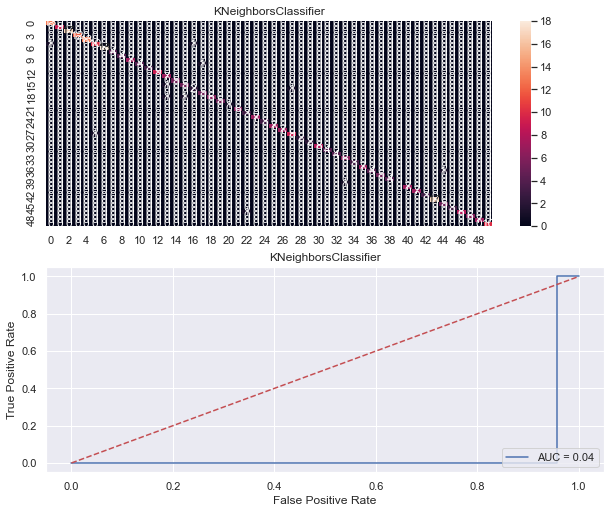

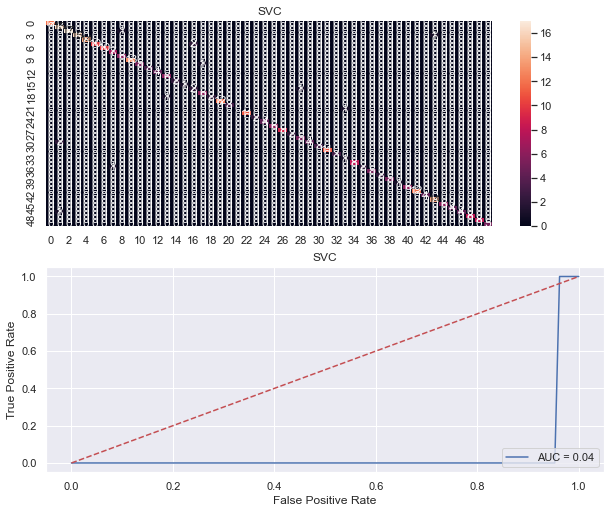

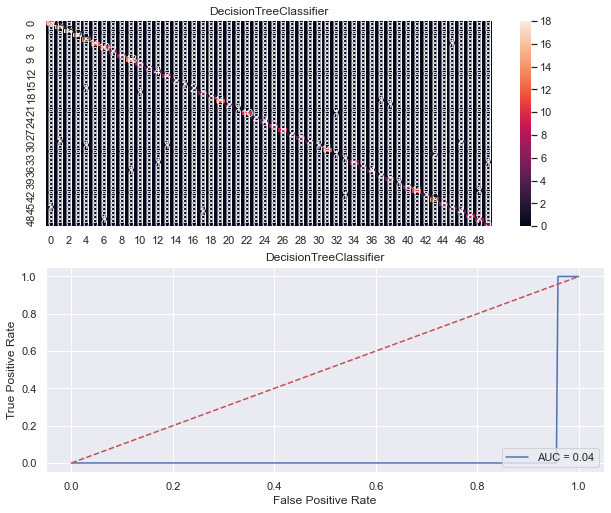

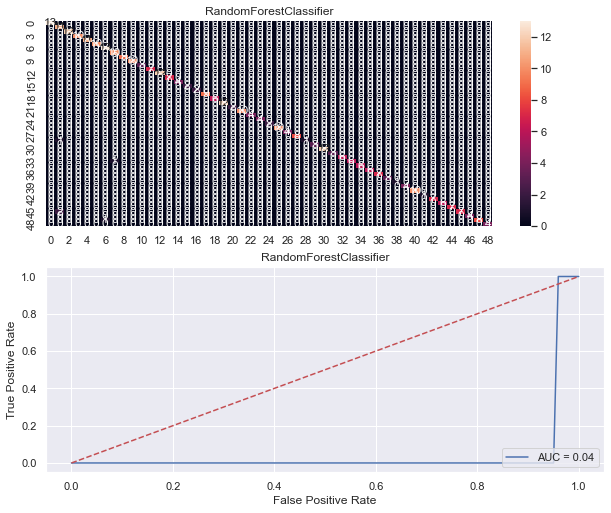

In [225]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .22)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [226]:
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result


,Model,Accuracy_Score,Cross Val Score,ROC_AUC_Curve,RandomState
0,KNeighborsClassifier,96.706587,92.818491,4.307692,64
1,SVC,96.407186,93.871558,4.245283,76
2,DecisionTreeClassifier,93.712575,86.551934,4.245283,76
3,RandomForestClassifier,98.502994,96.704862,4.489164,55


I choose RandomForestClassifier as my final model because it performs very well on dataset

In [227]:
# GridSearchCV for RandomForestClassifier
parameters = { 'n_estimators': [100,150, 200, 250, 300], 'criterion': ['gini', 'entropy'], 'max_features':
              ['auto', 'sqrt', 'log2']
}
gsc = GridSearchCV(estimator = RFC, param_grid = parameters, cv=10)
gsc.fit(x,y)
gsc.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 150}

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=55, test_size = 0.20)
rfc = RandomForestClassifier(criterion= 'gini', max_features='sqrt', n_estimators= 200)
rfc.fit(x_train, y_train)
y_pred =  rfc.predict(x_test)
print (y_pred)

[38 44 12  5 12 36 37 48 45 26  1  9 41 12 35 17 18 41 19 34 42 44  8 11
 36  2 19 31 44 10  3  5 19 35  7  5  6  0  1  4 48 46  0 26  0 30  5 45
  0  0 27 32 49  7 11  8 28  8 11 47 18 24 13 24 50 38 44 47 49  8  1 14
 26 28  9  0 17  6  7 17  2 26 34 25 18  0 45 11  9 13 45 46 49 35  6 17
 12 44  8 27  1 12  2  1 30 31 31 38 19  7 31 37 29 25  4  6  9 38 19 46
  0 42  3  9 28 19 18  0 31  4  1 13 16 42 22 37 35 31 17 26  8 49 14 12
  5  2 47  5  3 37 27 35 31  4 47  2 28 41 26 22 24 15 18  1  6 32 47  5
 47 17 42 11 31 35  6 49 47 24  2  4  5 37  3  1 42 26  6 46 48 22  0  5
 14 17 13 13 15 19 19  3  7  3 12 44  2  2  7  5  1 20 23 50  7 31 10 34
 49  0  9 10 32  6 19 17 28 49  4 26 42  1 42 39 28  4 22  8 38 17 12 19
 11  4 14 49 22  3 26 36 45 34 12  7 38  0 20  0 46 48 31  8  2  3  3 19
  1 39 36  6  4 26  1 22 46  9  9 39 31 38 34 18 41  9 42 40 46  6  6  3
 27 34 43 22 11 28 47 23 19 13 45 23 31 36 50 13]


In [229]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_cls_avocado.csv')

accuracy score:  0.9901315789473685
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        10
           6       0.82      1.00      0.90         9
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
          16       

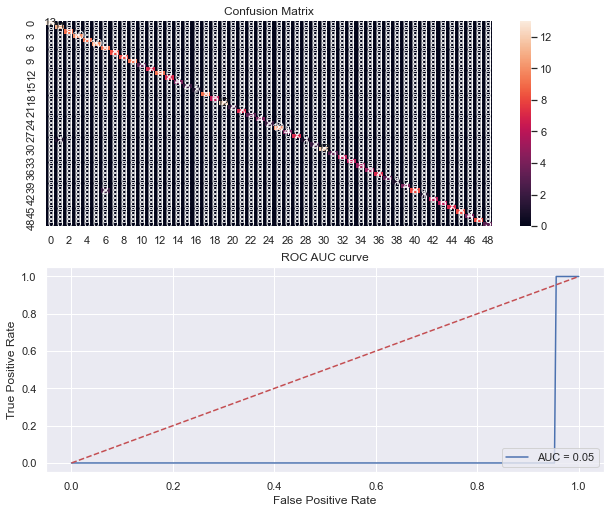

In [230]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(rfc, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')